****


# **Spam Email Detection Using Logistic Regression and Multinomial Naive Bayes**

****

****

# **Import Libraries**

****

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

****

# **Load Data**


****

In [27]:
spam_mail_data = pd.read_csv('/content/spam_mail.csv')

In [28]:
print(spam_mail_data)

      Category                                    Message Content
0          ham  Well, i'm gonna finish my bath now. Have a goo...
1          ham  Let me know when you've got the money so carlo...
2          ham                         U still going to the mall?
3          ham  Turns out my friends are staying for the whole...
4          ham  Text her. If she doesnt reply let me know so i...
...        ...                                                ...
11139      ham  Yes :)it completely in out of form:)clark also...
11140      ham  Sir, I need AXIS BANK account no and bank addr...
11141      ham  Hmmm.. Thk sure got time to hop ard... Ya, can...
11142      ham                   What time you coming down later?
11143      ham  Bloody hell, cant believe you forgot my surnam...

[11144 rows x 2 columns]


****

# **Empty values are replaced with empty strings to clean the data.**

****

In [29]:
spam = spam_mail_data.where((pd.notnull(spam_mail_data)),'')

In [30]:
spam.head()

,Category,Message Content
0,ham,"Well, i'm gonna finish my bath now. Have a goo..."
1,ham,Let me know when you've got the money so carlo...
2,ham,U still going to the mall?
3,ham,Turns out my friends are staying for the whole...
4,ham,Text her. If she doesnt reply let me know so i...


In [31]:
spam.shape

(11144, 2)

In [32]:
spam['Category'] = spam['Category'].map({'spam': 0, 'ham': 1}).astype(int)

In [33]:
print(spam['Category'].dtype)

int64


****

# **Feature and Label Separation**


****

In [34]:
X = spam['Message Content']
Y = spam['Category']

In [35]:
print(X)

0        Well, i'm gonna finish my bath now. Have a goo...
1        Let me know when you've got the money so carlo...
2                               U still going to the mall?
3        Turns out my friends are staying for the whole...
4        Text her. If she doesnt reply let me know so i...
                               ...                        
11139    Yes :)it completely in out of form:)clark also...
11140    Sir, I need AXIS BANK account no and bank addr...
11141    Hmmm.. Thk sure got time to hop ard... Ya, can...
11142                     What time you coming down later?
11143    Bloody hell, cant believe you forgot my surnam...
Name: Message Content, Length: 11144, dtype: object


In [36]:
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
11139    1
11140    1
11141    1
11142    1
11143    1
Name: Category, Length: 11144, dtype: int64


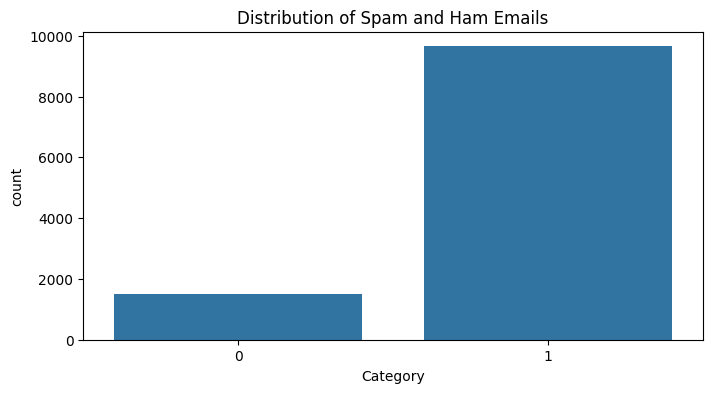

In [37]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Category', data=spam)
plt.title('Distribution of Spam and Ham Emails')
plt.show()

****

# **80/20 Data Split**

****

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [39]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(11144,)
(8915,)
(2229,)


****

# **Feature Extraction & Transformation Using The TF-IDF Vectorizer**

****

In [40]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

In [41]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [42]:
print(X_train)

11118                    K..i deleted my contact that why?
2099                                Cold. Dont be sad dear
10222    Not thought bout it... || Drink in tap & spile...
8878                             What was she looking for?
9732     Boo what time u get out? U were supposed to ta...
                               ...                        
6400     Yes..he is really great..bhaji told kallis bes...
9160     FREE for 1st week! No1 Nokia tone 4 ur mob eve...
9859     Thanks again for your reply today. When is ur ...
1688     The last thing i ever wanted to do was hurt yo...
5994                         Gud mrng dear have a nice day
Name: Message Content, Length: 8915, dtype: object


In [43]:
print(X_train_features)

  (0, 2130)	0.5653465507427051
  (0, 2407)	0.8248534885440723
  (1, 2363)	0.41096370856351166
  (1, 6281)	0.5414936528091169
  (1, 2596)	0.3917386470813258
  (1, 2031)	0.620027649862534
  (2, 5249)	0.1402179530587014
  (2, 1753)	0.2991605306689425
  (2, 1636)	0.2991605306689425
  (2, 6876)	0.5208628823565573
  (2, 3307)	0.24856987409256448
  (2, 5859)	0.2315837629960804
  (2, 6461)	0.2872989635832283
  (2, 6825)	0.2991605306689425
  (2, 7187)	0.2991605306689425
  (2, 2640)	0.23484017530714332
  (2, 1564)	0.23719122875689655
  (2, 7344)	0.20416754879128712
  (3, 4497)	1.0
  (4, 7419)	0.3351956063449208
  (4, 6537)	0.4514392553875582
  (4, 7092)	0.5293837976693261
  (4, 7379)	0.31219520267803486
  (4, 1537)	0.5532932806136457
  (5, 344)	0.21480883952255878
  :	:
  (8913, 5989)	0.09372429592413689
  (8913, 2480)	0.10235003674063414
  (8913, 5796)	0.10726726874723704
  (8913, 3417)	0.07509279296703572
  (8913, 6648)	0.10168384298023052
  (8913, 4242)	0.07349246049548497
  (8913, 3224)	0.10

****


# **Model Training and Evaluation**

****

Logistic Regression:
Accuracy on training data: 0.98
Accuracy on test data: 0.98
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       309
           1       0.98      1.00      0.99      1920

    accuracy                           0.98      2229
   macro avg       0.99      0.93      0.95      2229
weighted avg       0.98      0.98      0.98      2229



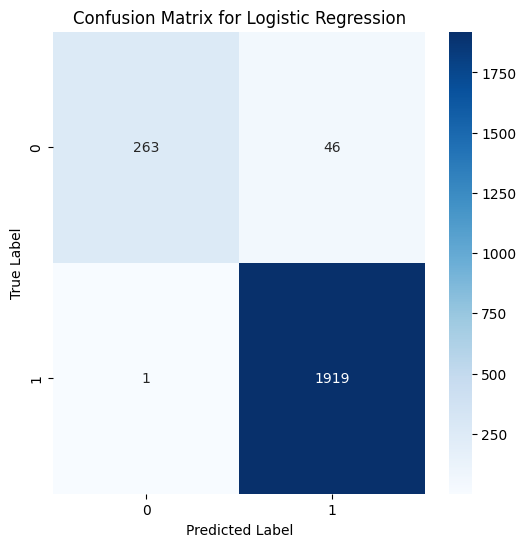

Naive Bayes:
Accuracy on training data: 0.99
Accuracy on test data: 0.99
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       309
           1       0.99      1.00      0.99      1920

    accuracy                           0.99      2229
   macro avg       0.99      0.96      0.98      2229
weighted avg       0.99      0.99      0.99      2229



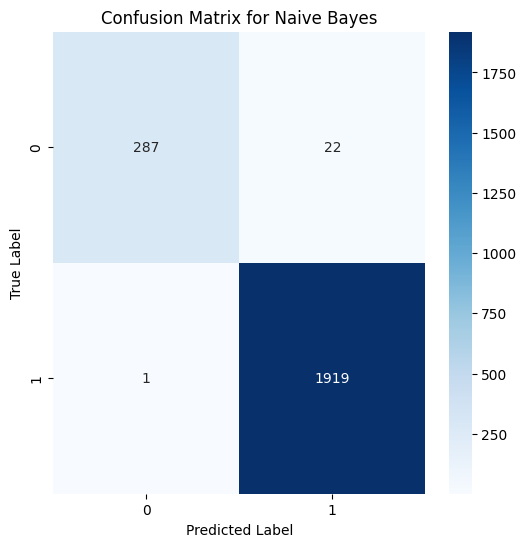

In [44]:
models = ['Logistic Regression', 'Naive Bayes']
classifiers = [LogisticRegression(), MultinomialNB()]

acc_train = []
acc_test = []

for i, model in enumerate(classifiers):
    model.fit(X_train_features, Y_train)
    predictions_train = model.predict(X_train_features)
    predictions_test = model.predict(X_test_features)

    train_accuracy = accuracy_score(Y_train, predictions_train)
    test_accuracy = accuracy_score(Y_test, predictions_test)
    acc_train.append(train_accuracy)
    acc_test.append(test_accuracy)

    print(f"{models[i]}:")
    print(f"Accuracy on training data: {train_accuracy:.2f}")
    print(f"Accuracy on test data: {test_accuracy:.2f}")
    print(classification_report(Y_test, predictions_test))

    cf_matrix = confusion_matrix(Y_test, predictions_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {models[i]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

****

# **Comparison of Models**

****

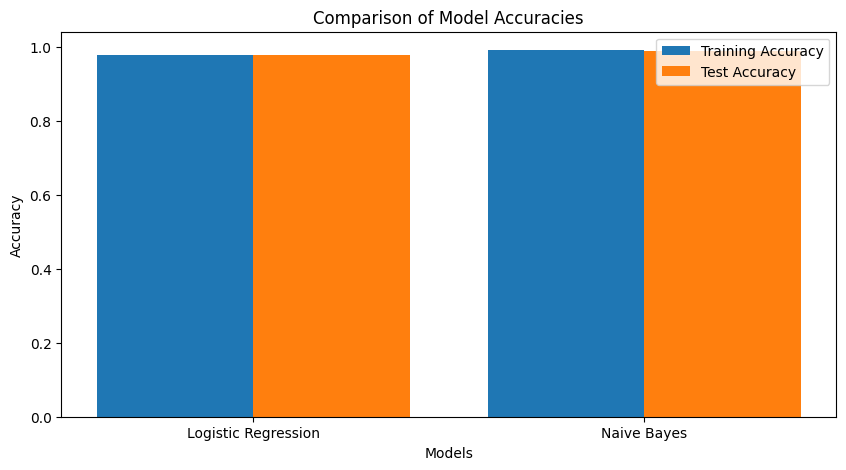

In [45]:
plt.figure(figsize=(10, 5))
x = np.arange(len(models))
plt.bar(x - 0.2, acc_train, 0.4, label='Training Accuracy')
plt.bar(x + 0.2, acc_test, 0.4, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(x, models)
plt.legend()
plt.show()

****

# **The models are used to make predictions on a new set of texts.**

****

In [46]:
texts = ["Free money!!!", "Hi mom, how are you?", "Reminder: Meeting at 11 AM today."]
labels = [1, 0, 0]

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
features = feature_extraction.fit_transform(texts)

logistic_model = LogisticRegression()
logistic_model.fit(features, labels)

input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

input_data_features = feature_extraction.transform(input_mail)

prediction = logistic_model.predict(input_data_features)
print("Logistic Regression Prediction:", "Ham mail" if prediction[0] == 0 else "Spam mail")

Logistic Regression Prediction: Ham mail


In [47]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(features, labels)

input_data_features = feature_extraction.transform(input_mail)

naive_bayes_prediction = naive_bayes_model.predict(input_data_features)
print("Naive Bayes Prediction:", "Ham mail" if naive_bayes_prediction[0] == 0 else "Spam mail")

Naive Bayes Prediction: Ham mail


****


# **Stratified K-Fold Cross-Validation**


****

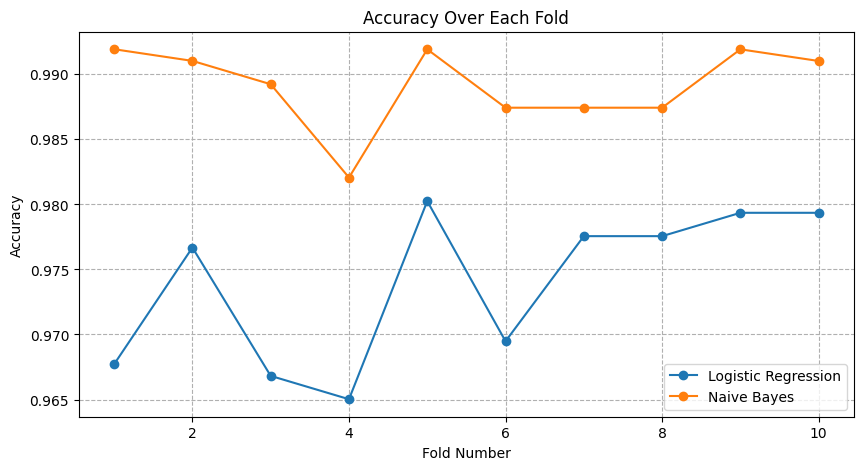

Average Logistic Regression accuracy: 0.97
Average Naive Bayes accuracy: 0.99


In [48]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_features = feature_extraction.fit_transform(X)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)
logistic_scores = []
naive_bayes_scores = []
fold_indices = []

for fold_index, (train_index, test_index) in enumerate(skf.split(X_features, Y)):
    X_train_fold, X_test_fold = X_features[train_index], X_features[test_index]
    Y_train_fold, Y_test_fold = Y.iloc[train_index], Y.iloc[test_index]

    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_fold, Y_train_fold)
    lr_predictions = logistic_model.predict(X_test_fold)
    lr_accuracy = accuracy_score(Y_test_fold, lr_predictions)
    logistic_scores.append(lr_accuracy)

    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(X_train_fold, Y_train_fold)
    nb_predictions = naive_bayes_model.predict(X_test_fold)
    nb_accuracy = accuracy_score(Y_test_fold, nb_predictions)
    naive_bayes_scores.append(nb_accuracy)

    fold_indices.append(fold_index + 1)

plt.figure(figsize=(10, 5))
plt.plot(fold_indices, logistic_scores, marker='o', label='Logistic Regression')
plt.plot(fold_indices, naive_bayes_scores, marker='o', label='Naive Bayes')
plt.title('Accuracy Over Each Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

print(f'Average Logistic Regression accuracy: {np.mean(logistic_scores):.2f}')
print(f'Average Naive Bayes accuracy: {np.mean(naive_bayes_scores):.2f}')

****

# **Monte Carlo Cross-Validation**

****

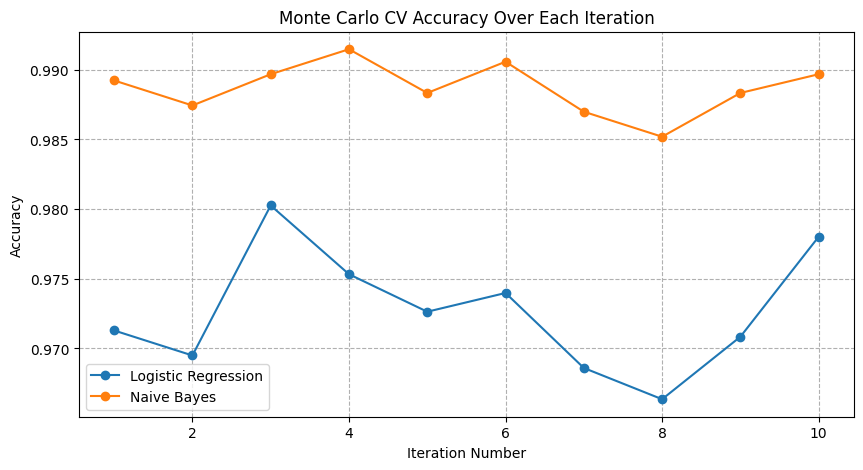

Average Logistic Regression accuracy: 0.97
Average Naive Bayes accuracy: 0.99


In [49]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_features = feature_extraction.fit_transform(X)

n_iterations = 10
test_size = 0.2

logistic_scores = []
naive_bayes_scores = []

for i in range(n_iterations):
    X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size=test_size, random_state=i)

    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, Y_train)
    lr_predictions = logistic_model.predict(X_test)
    lr_accuracy = accuracy_score(Y_test, lr_predictions)
    logistic_scores.append(lr_accuracy)

    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(X_train, Y_train)
    nb_predictions = naive_bayes_model.predict(X_test)
    nb_accuracy = accuracy_score(Y_test, nb_predictions)
    naive_bayes_scores.append(nb_accuracy)

plt.figure(figsize=(10, 5))
iterations = range(1, n_iterations + 1)
plt.plot(iterations, logistic_scores, marker='o', label='Logistic Regression')
plt.plot(iterations, naive_bayes_scores, marker='o', label='Naive Bayes')
plt.title('Monte Carlo CV Accuracy Over Each Iteration')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

print(f'Average Logistic Regression accuracy: {np.mean(logistic_scores):.2f}')
print(f'Average Naive Bayes accuracy: {np.mean(naive_bayes_scores):.2f}')